In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

/home/rafael/prj/data_analysis/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
tit_df = pd.read_csv('train.csv')

In [3]:
tit_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


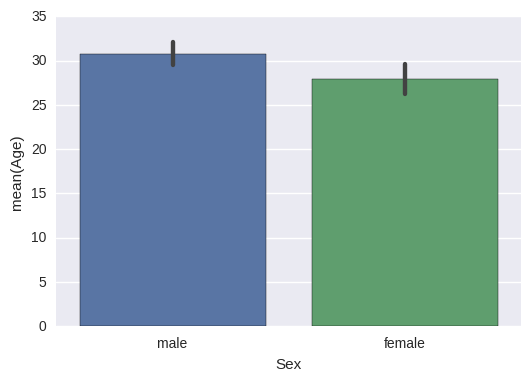

In [31]:
sns.barplot(y='Age', x='Sex', data=tit_df)

In [38]:
# Using Bokeh to display interactive plots
from bokeh.charts import Bar, output_notebook, show

p = Bar(tit_df, 'Sex', values='Age', agg='mean')
output_notebook()
show(p)

Loading BokehJS ...

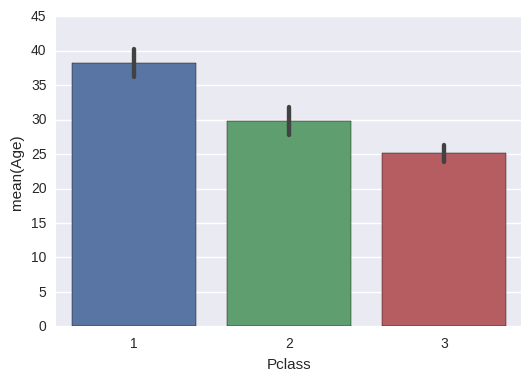

In [6]:
sns.barplot(y='Age', x='Pclass', data=tit_df)

In [39]:
# Using Bokeh to display interactive plots
from bokeh.charts import Bar, output_notebook, show

p = Bar(tit_df, 'Pclass', values='Age', agg='mean')
output_notebook()
show(p)

Loading BokehJS ...

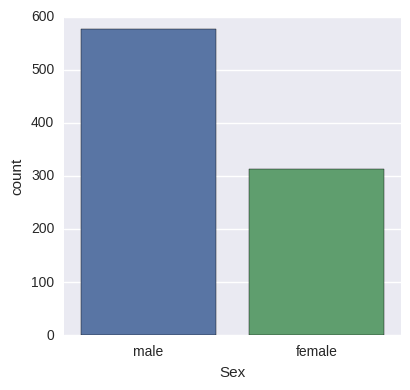

In [7]:
sns.factorplot('Sex', data=tit_df, kind='count')

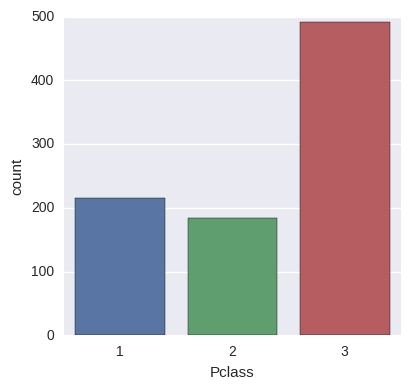

In [8]:
sns.factorplot('Pclass', data=tit_df, kind='count')

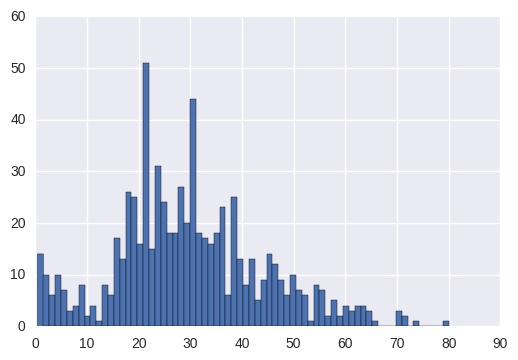

In [9]:
tit_df['Age'].hist(bins=70)

In [63]:
# Using Bokeh to display interactive plots
from bokeh.charts import Histogram, output_notebook, show

int_age = tit_df[tit_df['Age'] >= 1 ]

p = Histogram(int_age['Age'], bins=70)
output_notebook()
show(p)

Loading BokehJS ...

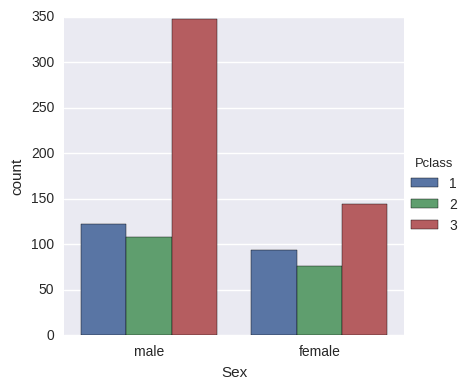

In [10]:
sns.factorplot('Sex', data=tit_df, hue='Pclass', kind='count')

In [11]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [12]:
tit_df['person'] = tit_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [13]:
tit_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


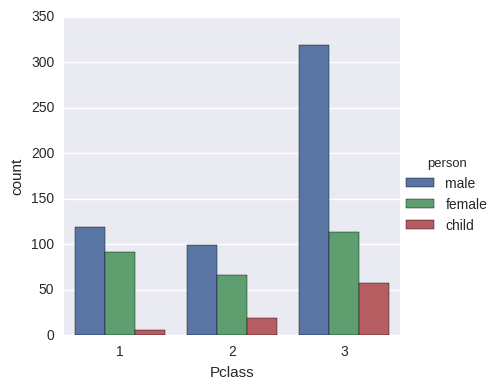

In [14]:
sns.factorplot('Pclass', data=tit_df, hue='person', kind='count')

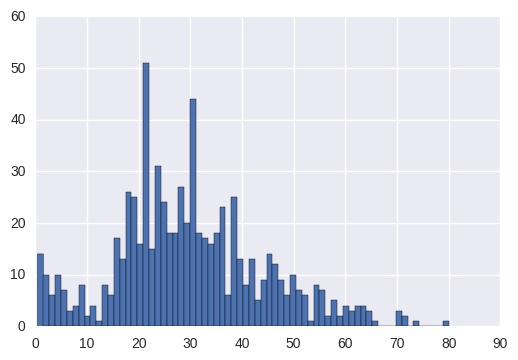

In [15]:
tit_df['Age'].hist(bins=70)

In [16]:
tit_df['Age'].mean()

29.69911764705882

In [17]:
tit_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

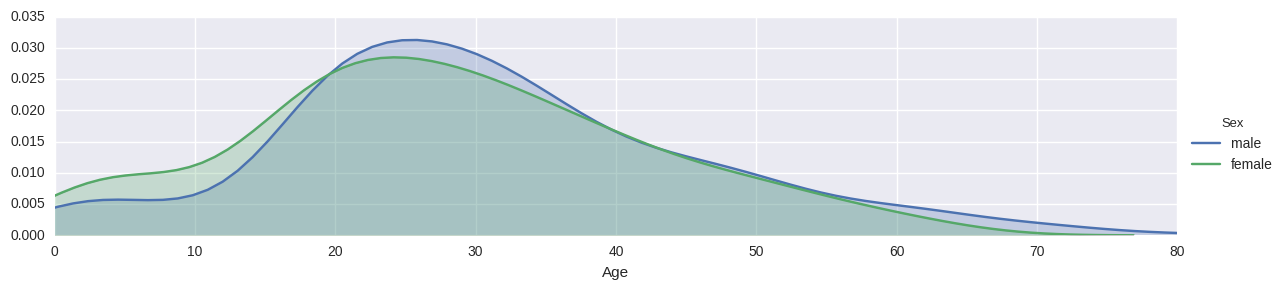

In [18]:
oldest = tit_df['Age'].max()

fig = sns.FacetGrid(tit_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
fig.set(xlim=(0, oldest))
fig.add_legend()

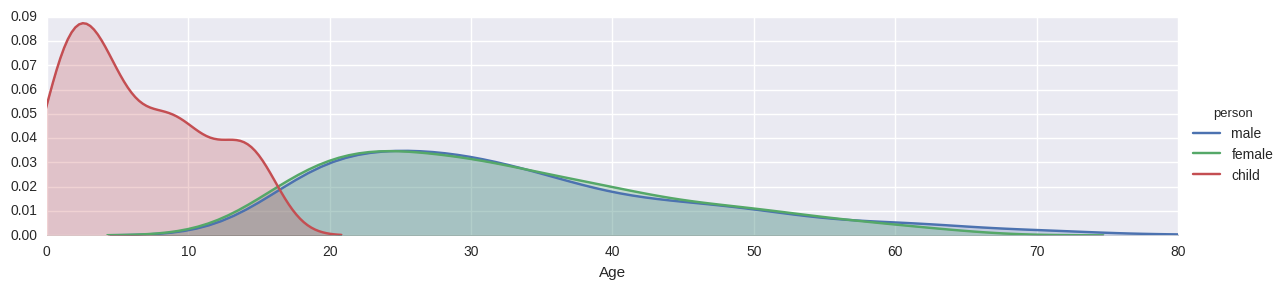

In [19]:
oldest = tit_df['Age'].max()

fig = sns.FacetGrid(tit_df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
fig.set(xlim=(0, oldest))
fig.add_legend()

In [64]:
# Using Bokeh to display interactive plots
from bokeh import mpl
from bokeh.charts import output_notebook, show

oldest = tit_df['Age'].max()

fig = sns.FacetGrid(tit_df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
fig.set(xlim=(0, oldest))
fig.add_legend()

output_notebook()
show(mpl.to_bokeh())

Loading BokehJS ...

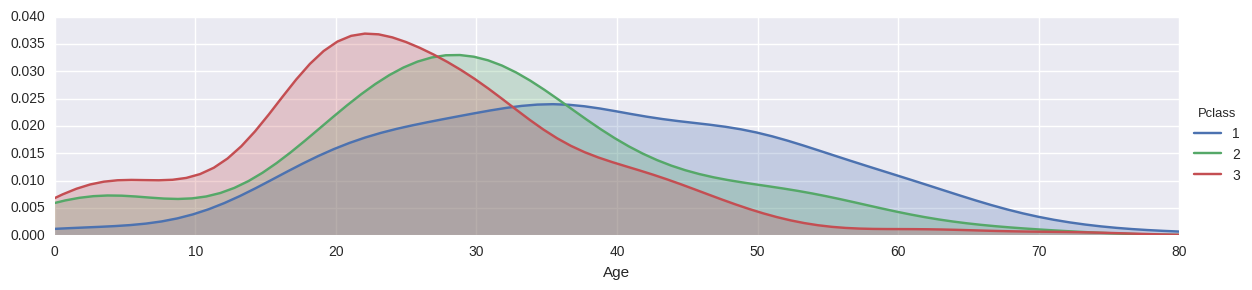

In [20]:
oldest = tit_df['Age'].max()

fig = sns.FacetGrid(tit_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
fig.set(xlim=(0, oldest))
fig.add_legend()

In [21]:
deck = tit_df['Cabin'].dropna()

In [22]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [23]:
levels = [level[0] for level in deck]

In [24]:
levels[0:5]

['C', 'C', 'E', 'G', 'C']

In [25]:
cabin_df = pd.DataFrame(levels)

In [26]:
cabin_df.columns = ['Cabin']

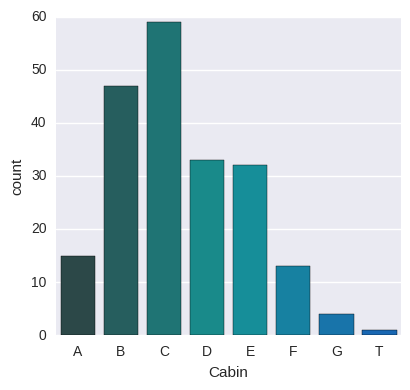

In [27]:
sns.factorplot('Cabin', data=cabin_df, palette='winter_d', kind='count', order=list('ABCDEFGT'))

In [28]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

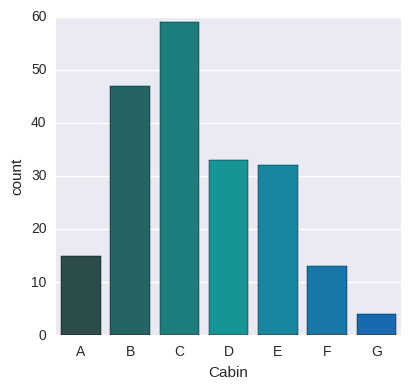

In [29]:
sns.factorplot('Cabin', data=cabin_df, palette='winter_d', kind='count', order=list('ABCDEFG'))

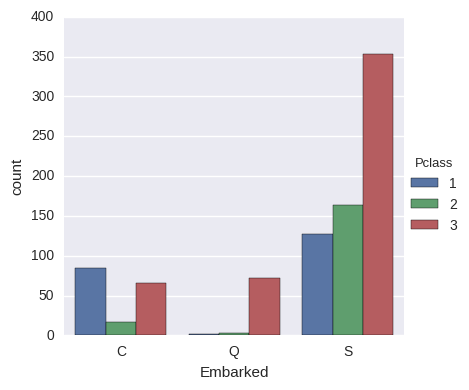

In [30]:
sns.factorplot('Embarked', data=tit_df, hue='Pclass', kind='count', order=list('CQS'))